# 📌 Title: 1. Exploratory Data Analysis (EDA)
# 🎯 Goal: Understand data, find patterns, and extract business insights

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

# Set style
plt.style.use('default')
sns.set_palette("Blues_r")

In [6]:
os.chdir("..")

In [8]:
df = pd.read_csv('data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(f"Shape: {df.shape}")
df.head()


Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Clean Data (Fix TotalCharges)

In [9]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True)  # Safe fill

# Replace 'No internet service' and 'No phone service' with 'No'
cols_to_fix = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']
for col in cols_to_fix:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})

# Create numeric target
df['ChurnNumeric'] = df['Churn'].map({'Yes': 1, 'No': 0})

## 🎨 EDA: Key Visuals (Add One by One) 
🔹 1. Churn Rate (Pie Chart)

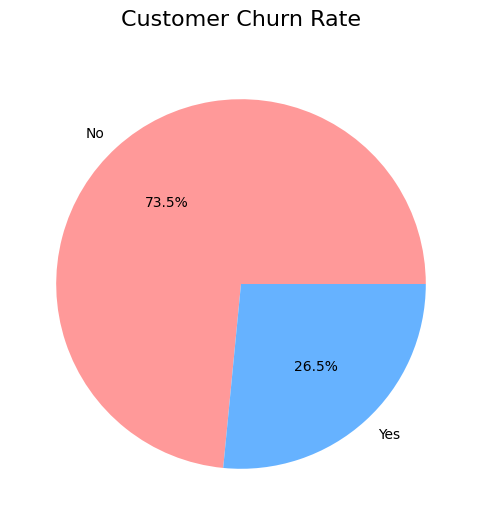

In [10]:
plt.figure(figsize=(6, 6))
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=['#FF9999','#66B2FF'])
plt.title("Customer Churn Rate", fontsize=16, pad=20)
plt.savefig('dashboard/assets/churn_pie.png', bbox_inches='tight', dpi=150)
plt.show()

🔹 2. Churn by Contract

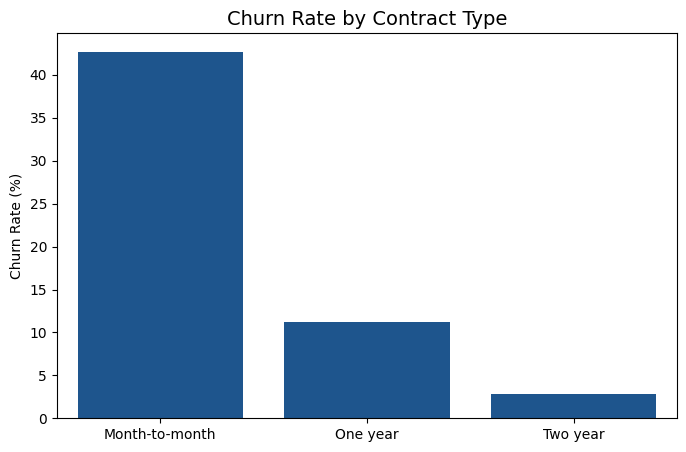

In [11]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Contract', y='ChurnNumeric', 
            estimator=lambda x: np.mean(x)*100, errorbar=None)
plt.title("Churn Rate by Contract Type", fontsize=14)
plt.ylabel("Churn Rate (%)")
plt.xlabel("")
plt.savefig('dashboard/assets/churn_by_contract.png', bbox_inches='tight', dpi=150)
plt.show()

🔹 3. Tenure vs Churn (Boxplot)

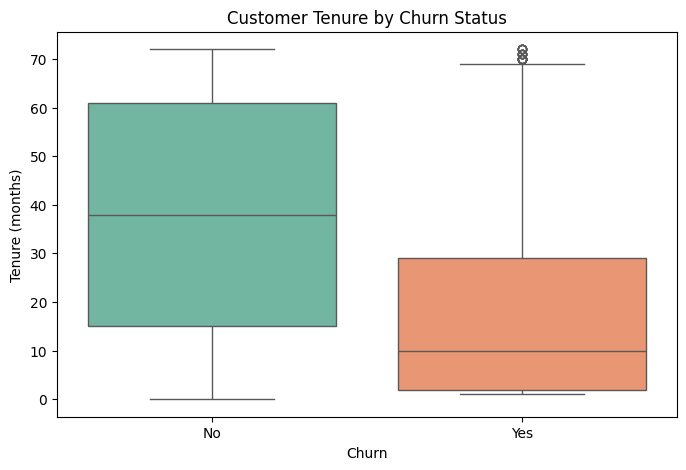

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='tenure', palette='Set2')
plt.title("Customer Tenure by Churn Status")
plt.ylabel("Tenure (months)")
plt.savefig('dashboard/assets/tenure_boxplot.png', bbox_inches='tight', dpi=150)
plt.show()

🔹 4. Monthly Charges vs Churn

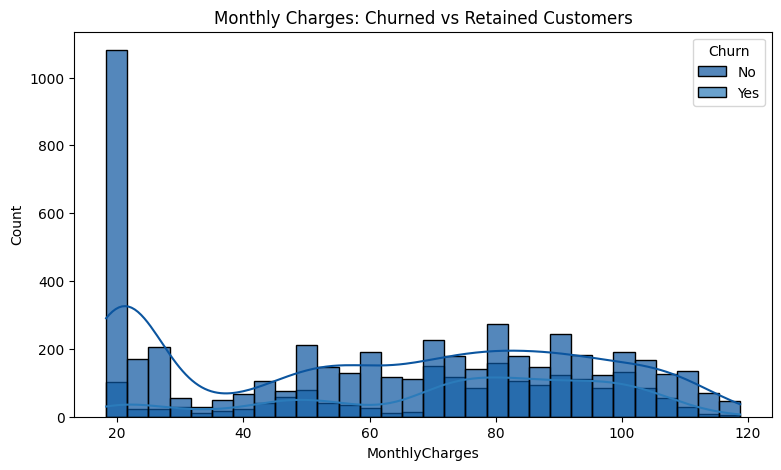

In [13]:
plt.figure(figsize=(9, 5))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', bins=30, kde=True, alpha=0.7)
plt.title("Monthly Charges: Churned vs Retained Customers")
plt.savefig('dashboard/assets/monthly_charges_hist.png', bbox_inches='tight', dpi=150)
plt.show()

🔹 5. Services Impact on Churn (Grid)

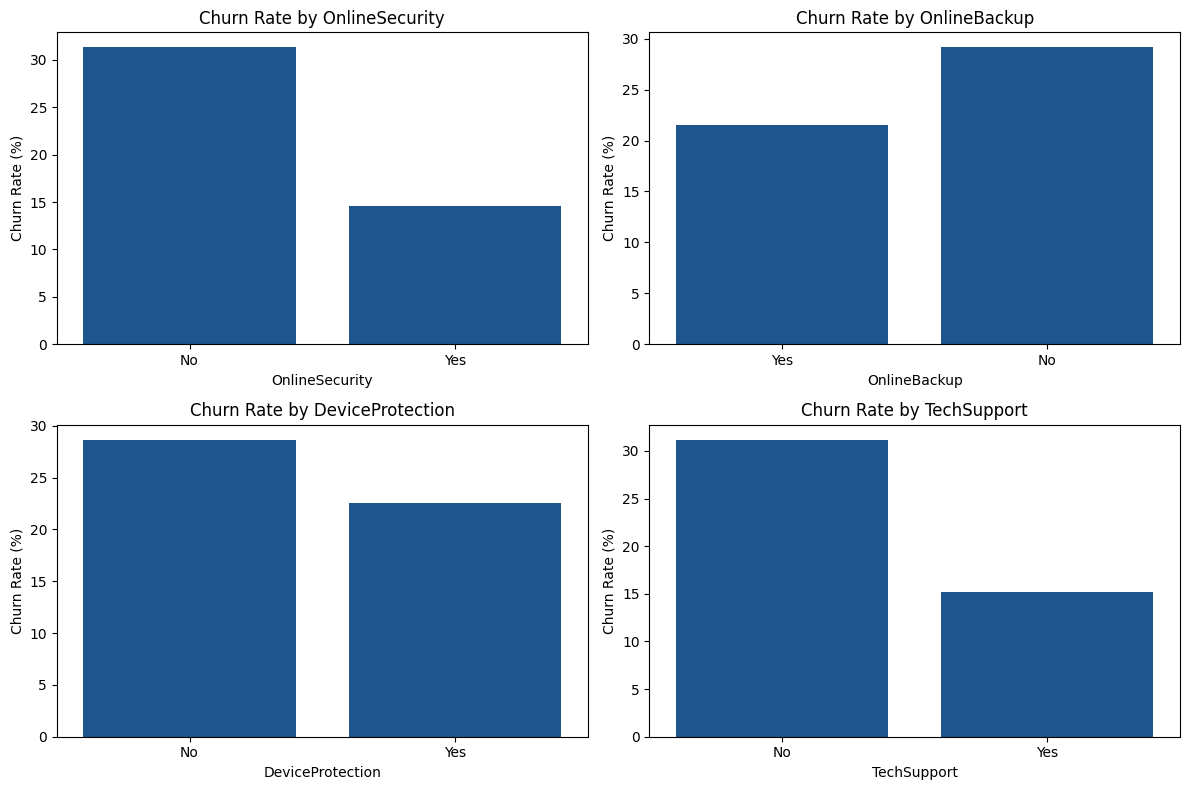

In [14]:
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, service in enumerate(services):
    row, col = i//2, i%2
    sns.barplot(data=df, x=service, y='ChurnNumeric', ax=axes[row, col],
                estimator=lambda x: np.mean(x)*100, errorbar=None)
    axes[row, col].set_ylabel("Churn Rate (%)")
    axes[row, col].set_title(f"Churn Rate by {service}")

plt.tight_layout()
plt.savefig('dashboard/assets/services_churn_grid.png', bbox_inches='tight', dpi=150)
plt.show()

🔹 6. Correlation Heatmap

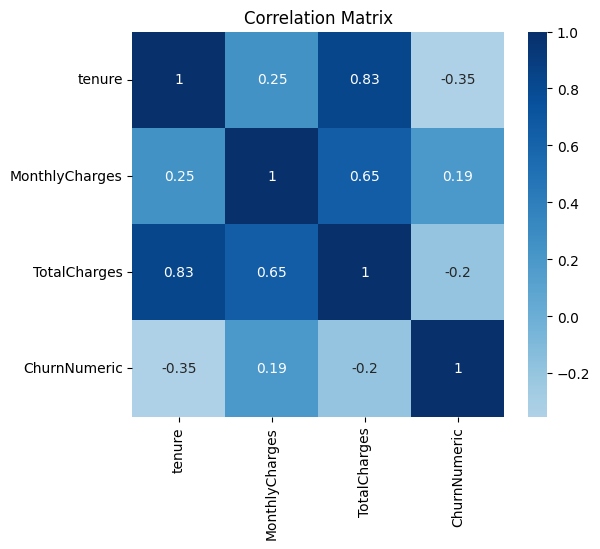

In [15]:
numeric_df = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'ChurnNumeric']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(numeric_df, annot=True, cmap='Blues', center=0)
plt.title("Correlation Matrix")
plt.savefig('dashboard/assets/correlation_heatmap.png', bbox_inches='tight', dpi=150)
plt.show()